#### [PREV](5.OOP_KNN.ipynb) | [HOME](../README.md) | [NEXT](7.OOP_Neural_Network_Adv.ipynb)

---

#  Neural Network Linear Regression: Simple approach

This guide trains a neural network model perform Linear Regression on the same [insects](data\insects.csv) you have been using. The data set contains measurements on a single species of insect captured on two continents. We want to predict an insects wing size given the other measurements we have.

#### Step 1 - Import Dependencies

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.18.0


#### Step 2: Import The Data

In [3]:
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects = pd.DataFrame({
    'continent': insects['continent'],
    'latitude': insects['latitude'],
    'sex': insects['sex'],
    'wingsize': insects['wingsize']
})

X_insects = pd.get_dummies(insects[['continent', 'latitude', 'sex']], dummy_na=True, dtype='int')

y_insects = insects['wingsize']

insects.head()

,continent,latitude,sex,wingsize
0,1,35.5,0,901
1,1,37.0,0,896
2,1,38.6,0,906
3,1,40.7,0,907
4,1,40.9,0,898


#### Step 3: Split The Data into Training And Testing Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_insects, y_insects, test_size=0.3, random_state=42)

#### Step 4: Visualise The Data

Text(0, 0.5, 'Wing Span')

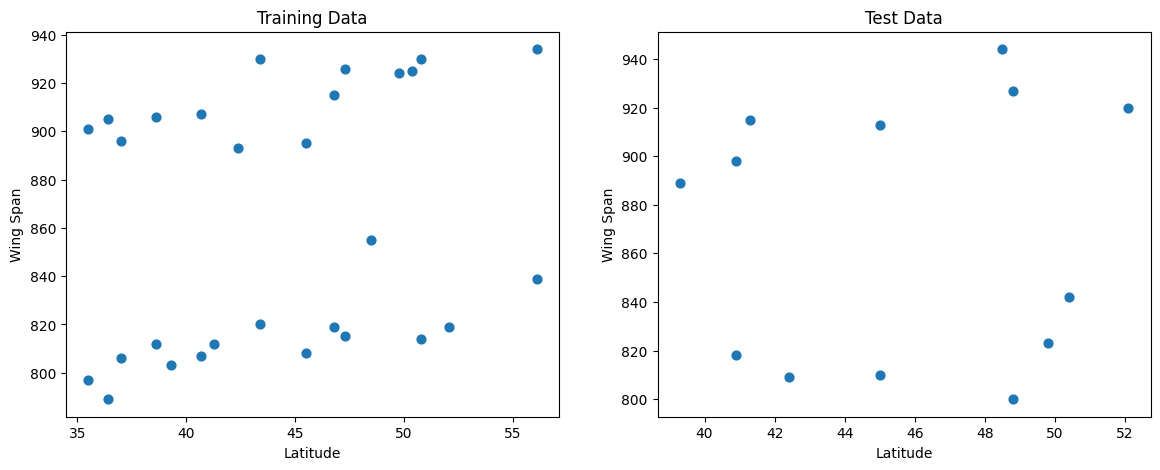

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(X_train[['latitude']], y_train, s=40)
axs[0].set_title("Training Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Wing Span")


axs[1].scatter(X_test[['latitude']], y_test, s=40)
axs[1].set_title("Test Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Wing Span")

#### Step 5: Instantiate a Neural Network Object And Configure The Layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [6]:
model = keras.Sequential([
    layers.Input(shape=(3,)),        # Input layer
    layers.Dense(3, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(1)   # Output layer with a single neuron (for regression)
])

In [7]:
model.compile(optimizer='adam', loss='MeanAbsoluteError')

#### Step 6: Fit The Model

Fitting (Training) the neural network model requires the following steps:

1. Fit the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


In [8]:
# You can adjust the number of epochs and batch size based on your data and resources.
model.fit(X_train, y_train, epochs=200, batch_size=2, validation_data=(X_test, y_test))

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 855.3646 - val_loss: 856.6930
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 860.7160 - val_loss: 855.9081
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 841.9352 - val_loss: 855.0889
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 843.1037 - val_loss: 854.2352
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 846.4388 - val_loss: 853.3551
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 848.7298 - val_loss: 852.4185
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 828.7378 - val_loss: 851.4603
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 851.9177 - val_loss: 850.4597
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 855.5056 - val_loss: 849.4407
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 841.2338 - val_loss: 848.3795
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 844.1746 - val_loss: 847.2714
Epoch 12/200
15/1

#### Step 7: Evaluate The Model

In [9]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 82.1069
Test Loss: 82.1069


### Step 8: Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [10]:
# Use the trained model to make predictions on new data
new_data = np.array([[1, 38, 0]])
predictions = model.predict(new_data)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
[[704.4879]]


#### Step 9: Plot the Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


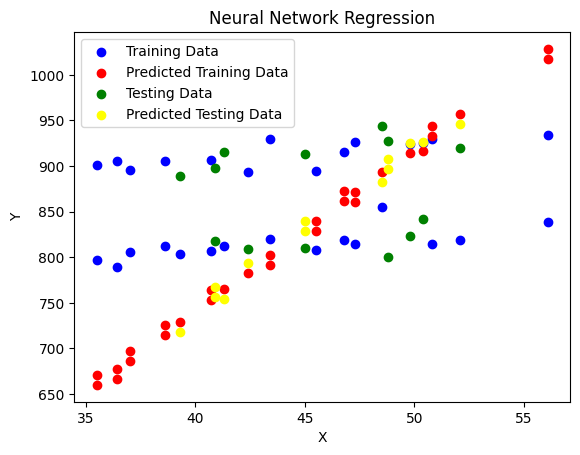

In [11]:
# Plot the actual data and model predictions
plt.scatter(X_train[['latitude']], y_train, label='Training Data', color='blue')
plt.scatter(X_train[['latitude']], model.predict(X_train), label='Predicted Training Data', color='red')
plt.scatter(X_test[['latitude']], y_test, label='Testing Data', color='green')
plt.scatter(X_test[['latitude']], model.predict(X_test), label='Predicted Testing Data', color='yellow')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Neural Network Regression')
plt.show()

#### Step 9: Evaluate The Model

In [12]:
predictions = model.predict(X_train).flatten()
table = pd.DataFrame({
    'Target': y_train,
    'Predicted result': predictions,
    'Loss': y_train - predictions
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost:.5f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
    Target  Predicted result        Loss
9      924        914.677612    9.322388
15     895        828.630310   66.369690
33     803        729.109497   73.890503
16     926        860.693176   65.306824
36     808        839.548157  -31.548157
35     820        802.141541   17.858459
0      901        659.956177  241.043823
24     807        763.500000   43.500000
5      893        782.863831  110.136169
11     905        666.534851  238.465149
40     819        957.111877 -138.111877
1      896        686.675171  209.324829
31     814        943.408203 -129.408203
21     797        670.874023  126.125977
2      906        715.175476  190.824524
32     789        677.452698  111.547302
41     839       1028.362671 -189.362671
3      907        752.582153  154.417847
37     815        871.611023  -56.611023
23     812        726.093323   85.906677
34     812        764.734802   47.265198
10     930        932.490356   -2.490356
22     806        